# 1. Classification

In [1]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [2]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# KNN

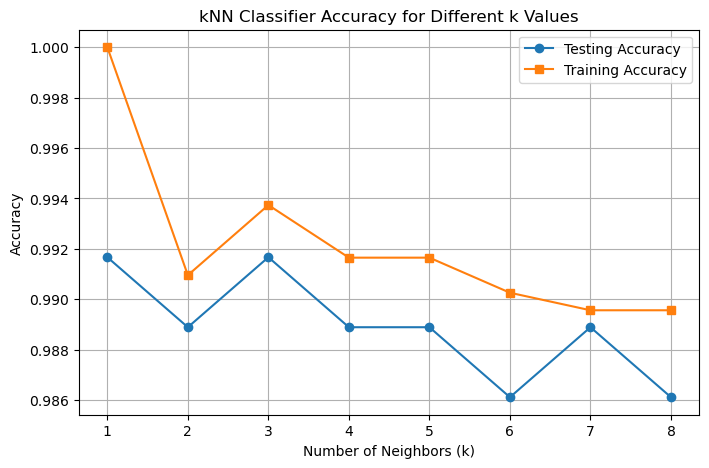

In [3]:
#kNN Classifier
number_neighbors = []
testing_scores = []
training_scores = []

# For loop: we loop 8 times as the number of neighbours:
for k in range(1, 9):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    number_neighbors.append(k)
    training_scores.append(kNN.score(X_train, y_train))
    testing_scores.append(kNN.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(number_neighbors, testing_scores, label="Testing Accuracy", marker='o')
plt.plot(number_neighbors, training_scores, label="Training Accuracy", marker='s')
plt.title("kNN Classifier Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### In this case, K = 3 looks best

# Kernels

In [4]:
#SVM/SVC Classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)    
    y_pred = svm.predict(X_test)
    print(kernel)
    print(classification_report(y_test, y_pred))

linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        38
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        33
           4       0.97      1.00      0.98        31
           5       1.00      0.94      0.97        32
           6       1.00      1.00      1.00        32
           7       0.97      1.00      0.99        37
           8       0.97      0.90      0.93        39
           9       0.92      0.94      0.93        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        39
           3

### The rbf and poly kernals are the best. Avoid using sigmoid

# Naive Bayes

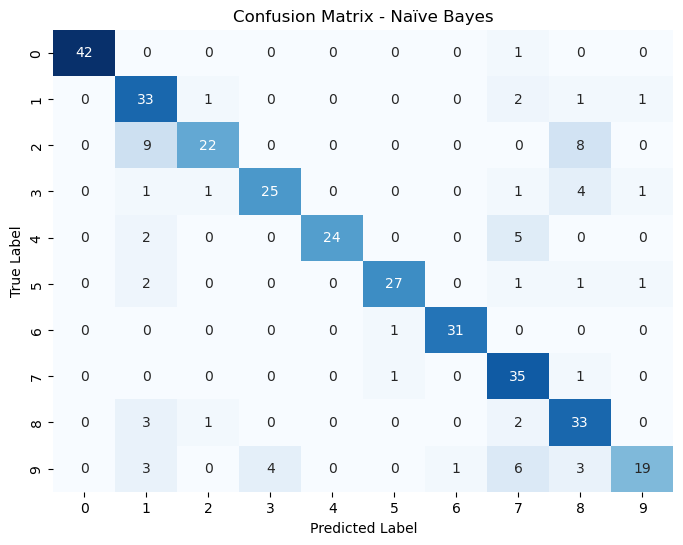

In [5]:
# Naive Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

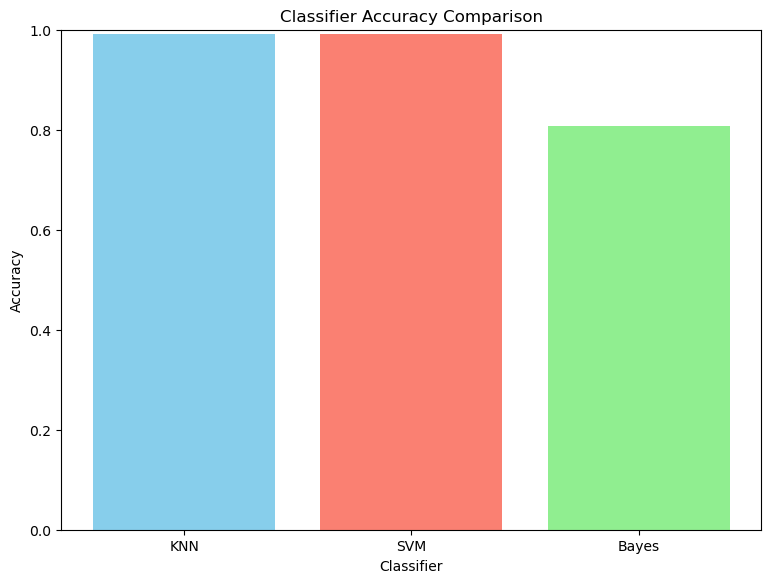

In [6]:
# Compare the accuracy of different classifiers in the same plot.
scores = []
labels = ["KNN", "SVM", "Bayes"]
classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='rbf'),
    GaussianNB()
]

for clf in classifiers:
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, scores, color=['skyblue', 'salmon', 'lightgreen'])
ax.set_title("Classifier Accuracy Comparison")
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.ylim(0.0, 1.0)
plt.show()

# 2. Regression

In [7]:
# Load gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


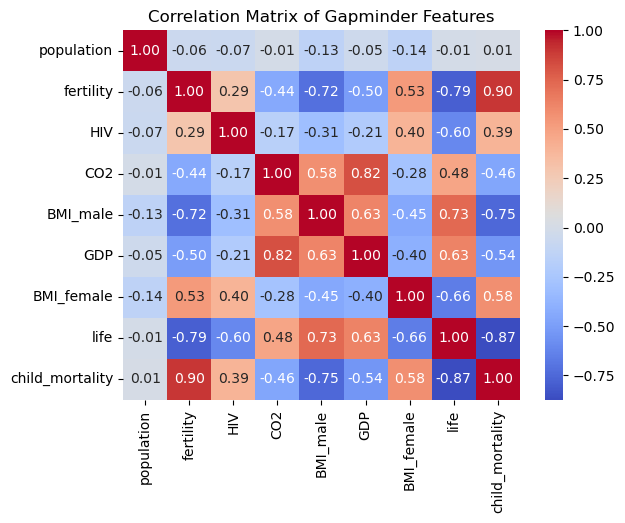

In [8]:
# Heatmap
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Gapminder Features")
plt.show()

Simple Linear Regression (Fertility only): 0.6192442167740035


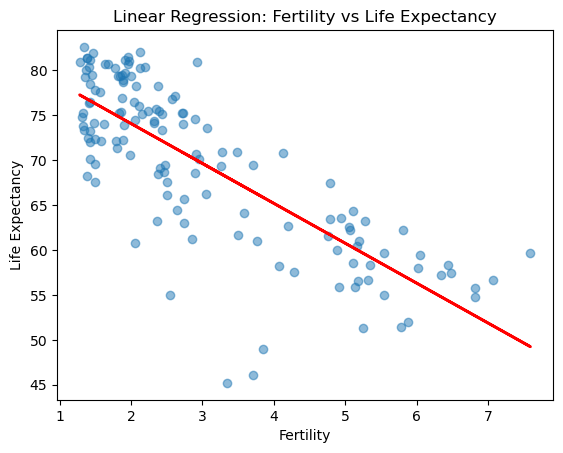

In [9]:
# Linear Regression
x = df["fertility"].values.reshape(-1, 1)  #reshape to 2D
y = df["life"]

regression = LinearRegression()
regression.fit(x, y)
print("Simple Linear Regression (Fertility only):", regression.score(x, y))

plt.scatter(x, y, alpha=0.5)
plt.plot(x, regression.predict(x), color="red", linewidth=2)
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.title("Linear Regression: Fertility vs Life Expectancy")
plt.show()

In [10]:
# Linear regression on all
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(X, y)
print("Multiple Linear Regression (All Features):", regression_all.score(X, y))

Multiple Linear Regression (All Features): 0.8974995317332959


In [11]:
simple_scores = cross_val_score(regression, x, y, cv=5)
print("Cross-Validation (Fertility only):", simple_scores)
print("Mean CV Score (Fertility only):", np.mean(simple_scores))

multi_scores = cross_val_score(regression_all, X, y, cv=5)
print("Cross-Validation (All Features):", multi_scores)
print("Mean CV Score (All Features):", np.mean(multi_scores))

Cross-Validation (Fertility only): [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Mean CV Score (Fertility only): 0.6168819644425119
Cross-Validation (All Features): [0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]
Mean CV Score (All Features): 0.8628894343259684


### The more features the higher predictive accuracy across all fields

# Logistic Regression

In [12]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


492 frauds,  284315 nonfrauds.


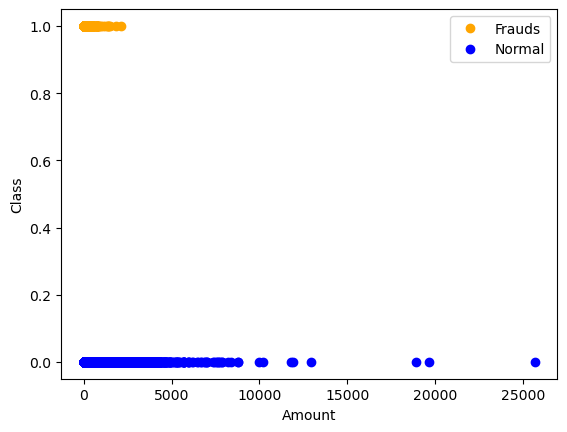

In [13]:
# Class and amount comparison
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds.")
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

### All the fraud cases occur at low amounts
### Normal cases occur at a wide range of amounts

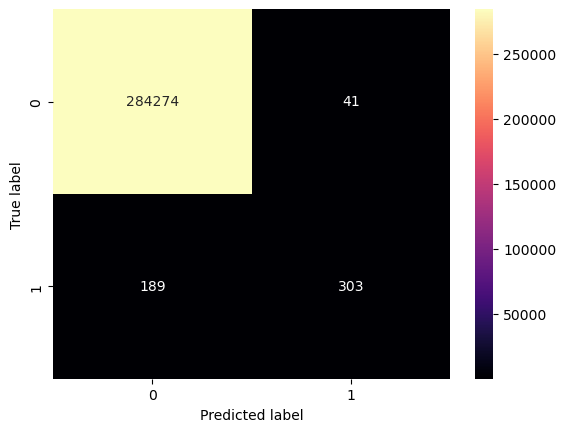

In [14]:
# Logistic Regression
from sklearn.preprocessing import StandardScaler

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_regression = LogisticRegression()
log_regression.fit(X_scaled, y)
y_pred = log_regression.predict(X_scaled)
conf_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()